# CPS 3.3

In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [186]:
lambda1 = 1
lambda2 = 0.1
nb_disc = 1501
nb_echant = 10000
theta1 = 0.05
theta2 = 0.05
sigma1 = 0.05
sigma2 = 0.05
x1 = 0.02
x2 = 0.02
T = 15
h = T/nb_disc


## Simulation du taux d'intérêt

On utilise $X_{t_{j}}^{(i)} = \theta_{i} + (X_{t_{j-1}}^{(i)} - \theta_{i})e^{-\lambda_{i}h} + \sigma \int_{t_{j-1}}^{t_{j}}e^{-\lambda_{i}(t_{j}-s}dB_{s}^{i}$ \\
On sait que $\int_{t_{j-1}}^{t_{j}}e^{-\lambda_{i}(t_{j}-s}dB_{s}^{i}$ suit une loi normale (fermeture de l'espace des gaussiennes), d'esperance 0 et de variance obtenue par l'isométrie d'Itô: $\frac{1 - e^{-\lambda_{i}h}}{2\lambda_{i}}$

In [189]:
def r(nb_disc,nb_echant,h,lambda1,lambda2, x1,x2,theta1,theta2, sigma1,sigma2):
  std1 = np.sqrt((1 - np.exp(-2*h*lambda1))/(2*lambda1))
  std2 = np.sqrt((1 - np.exp(-2*h*lambda2))/(2*lambda2))
  G1 = np.random.normal(0,std1,(nb_echant,nb_disc))
  G2 = np.random.normal(0,std2,(nb_echant,nb_disc))
  X1 = np.zeros((nb_echant,nb_disc))
  X2 = np.zeros((nb_echant,nb_disc))
  X1 = X1.T
  X1[0] = [x1]*(nb_echant)
  X1 = X1.T
  X2 = X2.T
  X2[0] = [x2]*(nb_echant)
  X2 = X2.T
  X1 = np.reshape(X1, (nb_echant,nb_disc))
  for j in range(1,nb_disc ):
    X1[:,j] = theta1 + (X1[:,j-1] - theta1)*np.exp(-lambda1 * h) + sigma1*G1[:,j-1]
    X2[:,j] = theta2 + (X2[:,j-1] - theta2)*np.exp(-lambda2 * h) + sigma2*G2[:,j-1]  
  r = X1 + X2
  return r

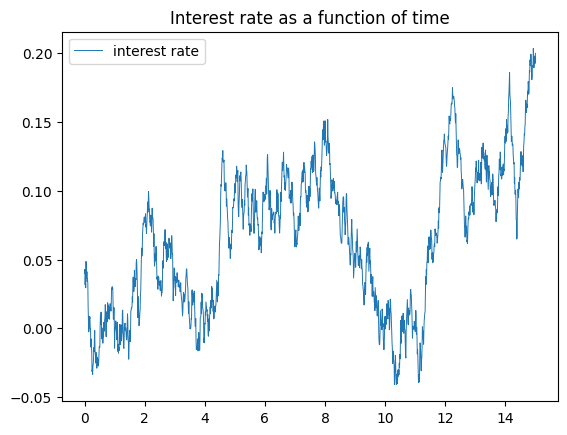

In [193]:
rate = r(nb_disc,nb_echant,h,lambda1,lambda2, x1,x2,theta1,theta2, sigma1,sigma2)
yt = rate[0]
traj_times = np.linspace(0, T, nb_disc)
plt.plot(traj_times, yt,
         linewidth=.7, label='interest rate')
plt.title("Interest rate as a function of time")
plt.legend()

## Simulation du prix ZCB

In [145]:
def price(r,h):
  T = (r.shape[1]-1)*h
  M = r.shape[0]
  somme = r[:,1:]
  t = [h] * (r.shape[1]-1)
  t = np.cumsum(t)
  somme = np.cumsum(somme,axis = 1)
  somme = (-h)*somme
  somme = np.exp(somme)
  somme = np.mean(somme,axis = 0)
  yields = np.log(somme)
  yields = yields/(-t)
  return somme,yields


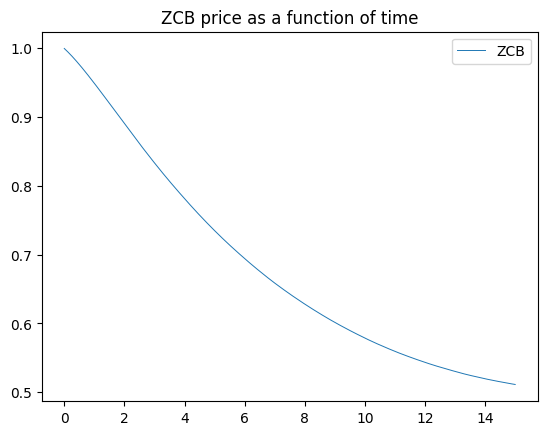

In [195]:
prix, yld = price(rate,h)
traj_times = np.linspace(0, T, nb_disc-1)
plt.plot(traj_times, prix,
         linewidth=.7, label='ZCB')
plt.title("ZCB price as a function of time")
plt.legend()

Monte carlo yield

Text(0.5, 1.0, 'Monte Carlo yield')

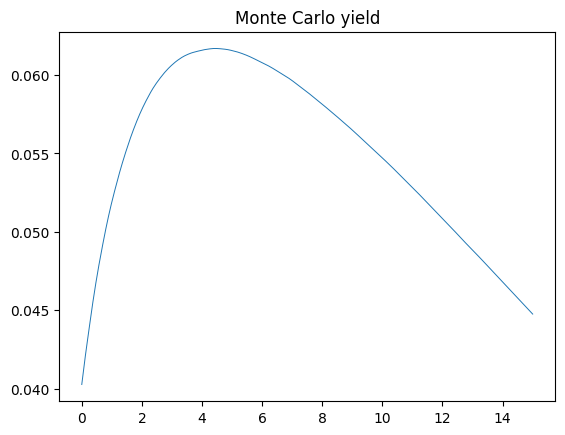

In [196]:
traj_times = np.linspace(0, T, nb_disc-1)
plt.plot(traj_times, yld,
         linewidth=.7, label='y')
plt.title("Monte Carlo yield")

In [197]:
def real_r(x1, x2, theta1, theta2, lambda1, lambda2, sigma1, sigma2, nb_disc, T):
    vals = np.linspace(0, T, nb_disc+1)[1:, None]  
    explbdaT1 = np.exp(-lambda1*vals)
    lbda_T1 = (1. - explbdaT1)/lambda1
    explbdaT2 = np.exp(-lambda2*vals)
    lbda_T2 = (1. - explbdaT2)/lambda2
    integral1 = vals + (2/lambda1)*(explbdaT1 - 1) + (0.5/lambda1)* (1 - explbdaT1**2)
    integral1 = integral1/(lambda1**2)
    integral2 = vals + (2/lambda2)*(explbdaT2 - 1) + (0.5/lambda2)* (1 - explbdaT2**2)
    integral2 = integral2/(lambda2**2)
    rho1 = theta1 + (x1 - theta1)*lbda_T1/vals - 0.5*sigma1**2/vals*integral1
    rho2 = theta2 + (x2 - theta2)*lbda_T2/vals - 0.5*sigma2**2/vals*integral2
    return rho1 +rho2

[[0.02014936]
 [0.02029765]
 [0.02044487]
 ...
 [0.0468725 ]
 [0.04687375]
 [0.046875  ]]


Text(0.5, 1.0, 'Real yield')

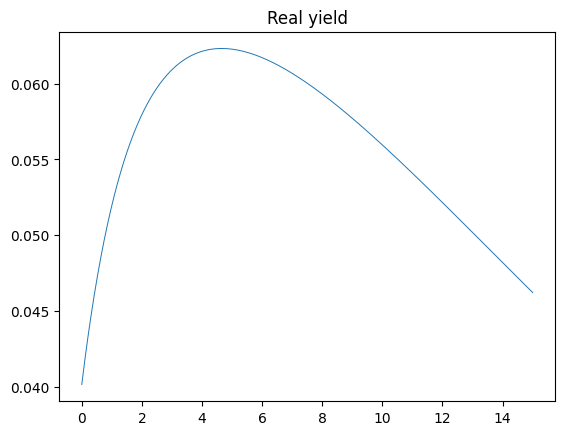

In [199]:
real_yld =real_r(x1, x2, theta1, theta2, lambda1, lambda2, sigma1, sigma2, nb_disc, T)
traj_times = np.linspace(0, T, nb_disc)
plt.plot(traj_times, real_yld,
         linewidth=.7, label='y')
plt.title("Real yield")

## Comparaison 

Text(0.5, 1.0, 'Comparison of real and MC yields')

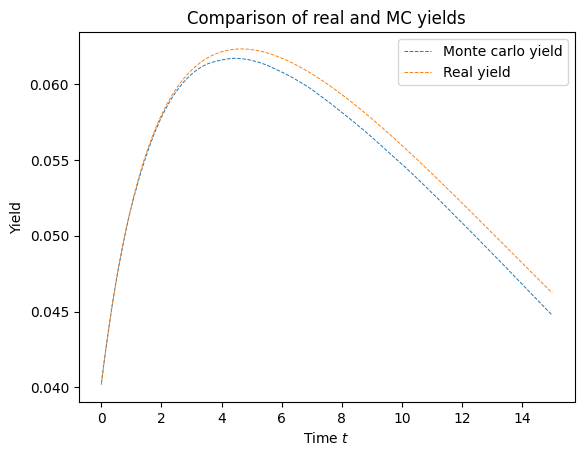

In [201]:
traj_times = np.linspace(0, T, nb_disc-1)
traj = np.linspace(0, T, nb_disc)
plt.plot(traj_times, yld,
         linewidth=.7, linestyle='--', label="Monte carlo yield")
plt.plot(traj, real_yld,
         linewidth=.7, linestyle='--', label="Real yield")
plt.xlabel("Time $t$")
plt.ylabel("Yield")
plt.legend()
plt.title("Comparison of real and MC yields")

# 2 Effects

In [202]:
vals = [0.01,0.02,0.05]

x2 fixe

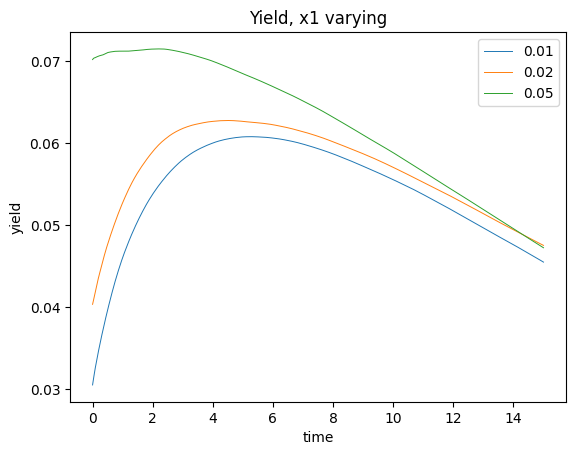

In [214]:
traj_times = np.linspace(0, T, nb_disc-1)
prixt = []
for elt in vals:
  rate = r(nb_disc,nb_echant,h,lambda1,lambda2, elt,x2,theta1,theta2, sigma1,sigma2)
  prix, yld = price(rate,h)
  prixt.append(prix)
  plt.plot(traj_times, yld,linewidth=.7, label=str(elt))
plt.title("Yield, x1 varying")
plt.xlabel("time")
plt.ylabel("yield")
plt.legend()



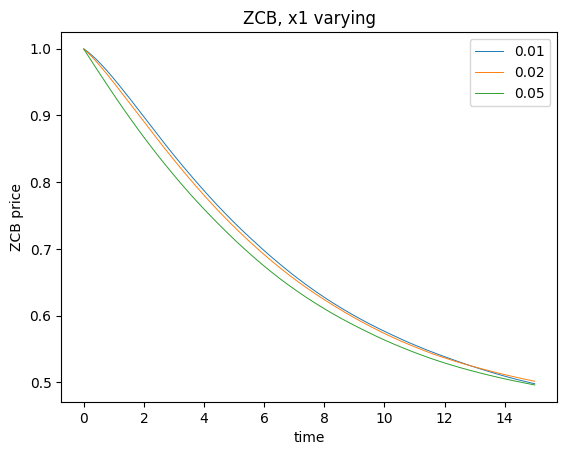

In [209]:
plt.plot(traj_times, prixt[0],linewidth=.7, label='0.01')
plt.plot(traj_times, prixt[1],linewidth=.7, label='0.02')
plt.plot(traj_times, prixt[2],linewidth=.7, label='0.05')
plt.title("ZCB, x1 varying")
plt.ylabel("ZCB price")
plt.xlabel("time")
plt.legend()

x1 fixe

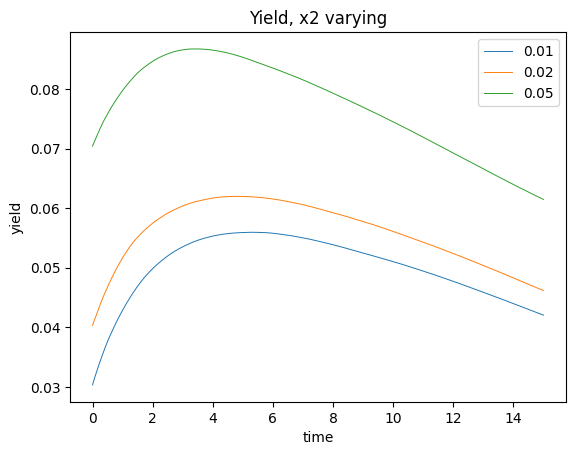

In [215]:
traj_times = np.linspace(0, T, nb_disc-1)
prixt = []
for elt in vals:
  rate = r(nb_disc,nb_echant,h,lambda1,lambda2, x1,elt,theta1,theta2, sigma1,sigma2)
  prix, yld = price(rate,h)
  prixt.append(prix)
  plt.plot(traj_times, yld,linewidth=.7, label=str(elt))
plt.title("Yield, x2 varying")
plt.xlabel("time")
plt.ylabel("yield")
plt.legend()



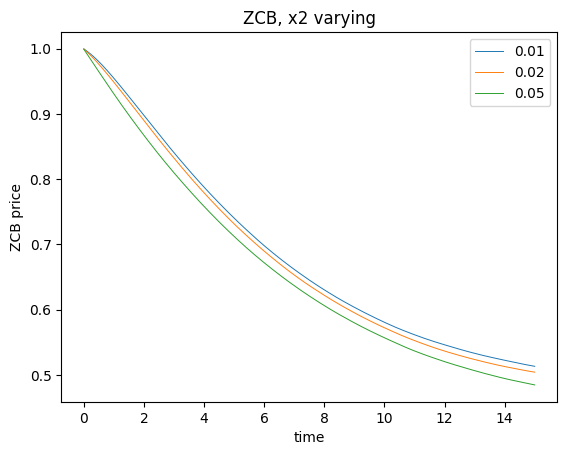

In [211]:
plt.plot(traj_times, prixt[0],linewidth=.7, label='0.01')
plt.plot(traj_times, prixt[1],linewidth=.7, label='0.02')
plt.plot(traj_times, prixt[2],linewidth=.7, label='0.05')
plt.title("ZCB, x2 varying")
plt.ylabel("ZCB price")
plt.xlabel("time")
plt.legend()

Le changement de $X_{1}$  et $X_{2}$ entraine, pour les deux paramètres, un changement des prix asymptotiques. Le ZCB diminue avec $X_{1}$ et avec $X_{2}$ tandis que le rendement, lui, augmente. Il est aussi à noter que l'estimation semble plus sensible aux variations de $X_{2}$ qu'à celles de $X_{1}$ 

Theta2 fixe

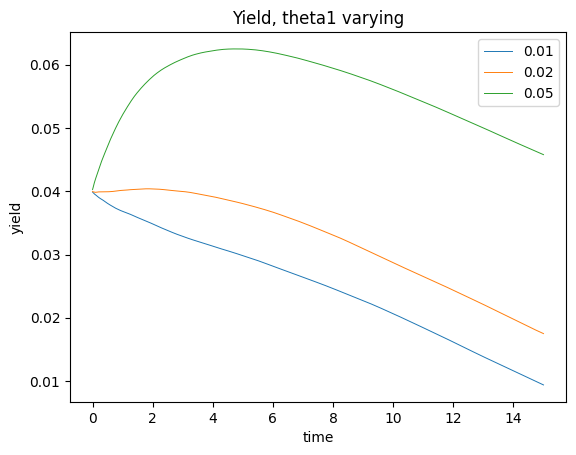

In [216]:
traj_times = np.linspace(0, T, nb_disc-1)
prixt = []
for elt in vals:
  rate = r(nb_disc,nb_echant,h,lambda1,lambda2, x1,x2,elt,theta2, sigma1,sigma2)
  prix, yld = price(rate,h)
  prixt.append(prix)
  plt.plot(traj_times, yld,linewidth=.7, label=str(elt))
plt.title("Yield, theta1 varying")
plt.xlabel("time")
plt.ylabel("yield")
plt.legend()



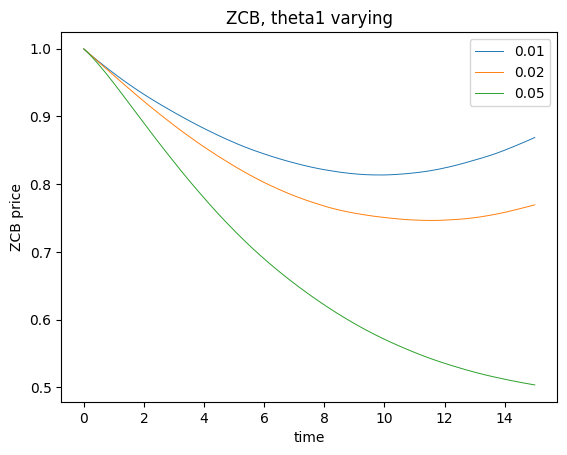

In [217]:
plt.plot(traj_times, prixt[0],linewidth=.7, label='0.01')
plt.plot(traj_times, prixt[1],linewidth=.7, label='0.02')
plt.plot(traj_times, prixt[2],linewidth=.7, label='0.05')
plt.title("ZCB, theta1 varying")
plt.ylabel("ZCB price")
plt.xlabel("time")
plt.legend()

Theta1 fixe

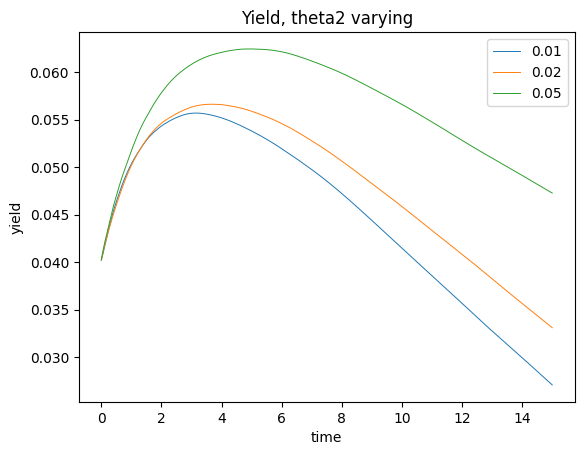

In [218]:
traj_times = np.linspace(0, T, nb_disc-1)
prixt = []
for elt in vals:
  rate = r(nb_disc,nb_echant,h,lambda1,lambda2, x1,x2,theta1,elt, sigma1,sigma2)
  prix, yld = price(rate,h)
  prixt.append(prix)
  plt.plot(traj_times, yld,linewidth=.7, label=str(elt))
plt.title("Yield, theta2 varying")
plt.xlabel("time")
plt.ylabel("yield")
plt.legend()



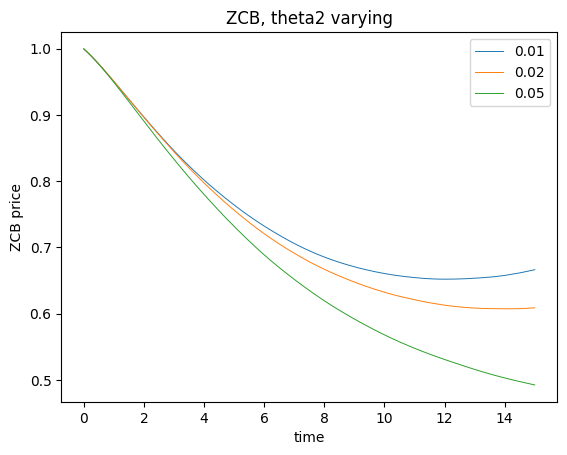

In [219]:
plt.plot(traj_times, prixt[0],linewidth=.7, label='0.01')
plt.plot(traj_times, prixt[1],linewidth=.7, label='0.02')
plt.plot(traj_times, prixt[2],linewidth=.7, label='0.05')
plt.title("ZCB, theta2 varying")
plt.ylabel("ZCB price")
plt.xlabel("time")
plt.legend()

Sigma2 fixe

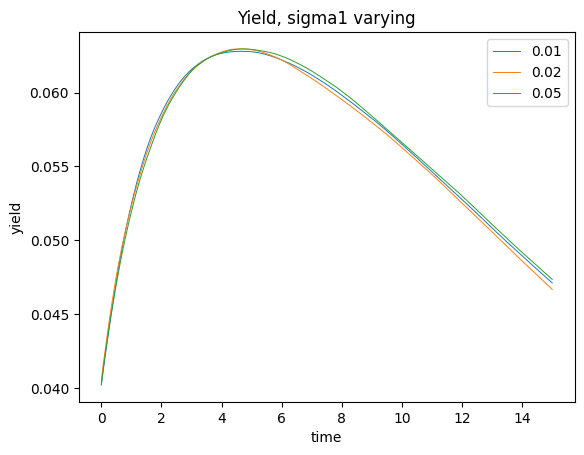

In [220]:
traj_times = np.linspace(0, T, nb_disc-1)
prixt = []
for elt in vals:
  rate = r(nb_disc,nb_echant,h,lambda1,lambda2, x1,x2,theta1,theta2, elt,sigma2)
  prix, yld = price(rate,h)
  prixt.append(prix)
  plt.plot(traj_times, yld,linewidth=.7, label=str(elt))
plt.title("Yield, sigma1 varying")
plt.xlabel("time")
plt.ylabel("yield")
plt.legend()



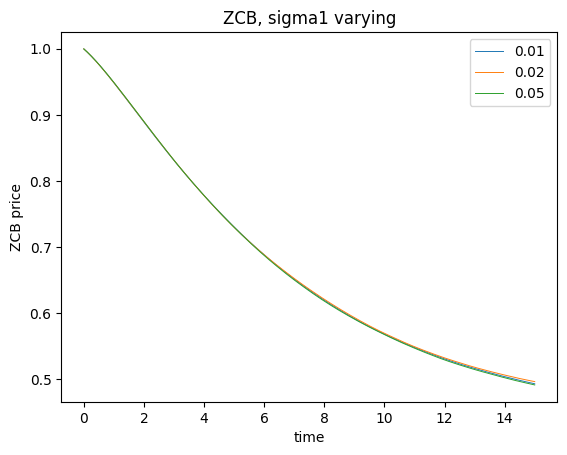

In [221]:
plt.plot(traj_times, prixt[0],linewidth=.7, label='0.01')
plt.plot(traj_times, prixt[1],linewidth=.7, label='0.02')
plt.plot(traj_times, prixt[2],linewidth=.7, label='0.05')
plt.title("ZCB, sigma1 varying")
plt.ylabel("ZCB price")
plt.xlabel("time")
plt.legend()

sigma1 fixe

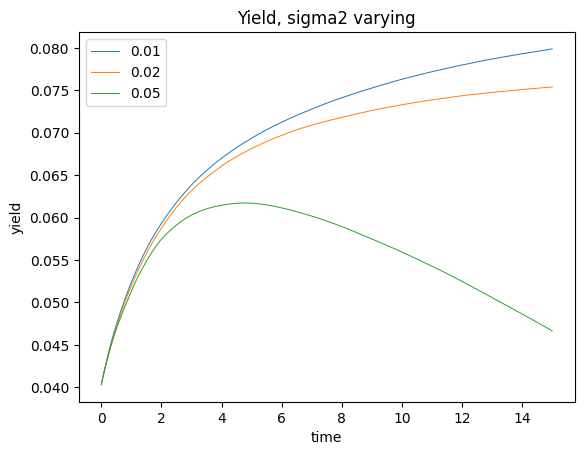

In [222]:
traj_times = np.linspace(0, T, nb_disc-1)
prixt = []
for elt in vals:
  rate = r(nb_disc,nb_echant,h,lambda1,lambda2, x1,x2,theta1,theta2, sigma1,elt)
  prix, yld = price(rate,h)
  prixt.append(prix)
  plt.plot(traj_times, yld,linewidth=.7, label=str(elt))
plt.title("Yield, sigma2 varying")
plt.xlabel("time")
plt.ylabel("yield")
plt.legend()



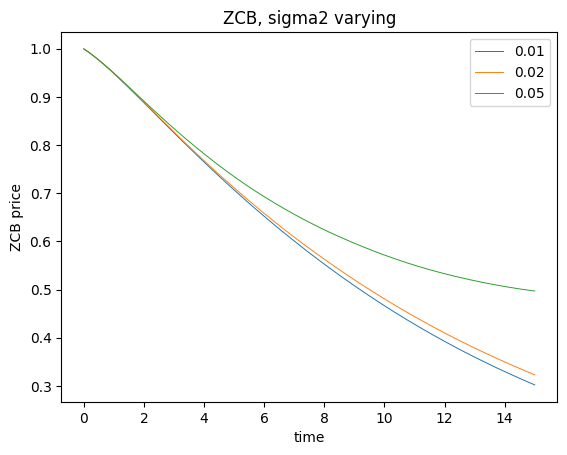

In [223]:
plt.plot(traj_times, prixt[0],linewidth=.7, label='0.01')
plt.plot(traj_times, prixt[1],linewidth=.7, label='0.02')
plt.plot(traj_times, prixt[2],linewidth=.7, label='0.05')
plt.title("ZCB, sigma2 varying")
plt.ylabel("ZCB price")
plt.xlabel("time")
plt.legend()

Le changement de la volatilité de $X_{2}$ a beaucoup plus d'impact sur le taux et sur le prix du ZCB (ce qui s'explique par le fait que son drift soit plus petit que celui de $X_{1}$)